# Simple Linear Regression

### Importing Libraries Numpy, Scikit-Learn, Pandas and Matplotlib 

In [88]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

####Applying Linear Regresstion using Build-in Model

Loading Dataset and Removing NaN values for the Dataset

In [89]:
df_train = pd.read_csv('/content/sample_data/train.csv')
df_test = pd.read_csv('/content/sample_data/test.csv')

x_train = df_train['x']
y_train = df_train['y']
x_test = df_test['x']
y_test = df_test['y']

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# find NaN values in y_train and y_test
train_nan_indices = np.isnan(y_train)
test_nan_indices = np.isnan(y_test)

# remove NaN values from y_train and corresponding rows from x_train
y_train = y_train[~train_nan_indices]
x_train = x_train[~train_nan_indices]

# remove NaN values from y_test and corresponding rows from x_test
y_test = y_test[~test_nan_indices]
x_test = x_test[~test_nan_indices]

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

Scalling the dataset and Applying Linear Reggression Model which we imported from Scikit-Learn

In [90]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LinearRegression().fit(x_train_scaled, y_train)

Testing Model Accuracy

In [91]:
y_pred = model.predict(x_test_scaled)

print(r2_score(y_test, y_pred))
print('Weights:', model.coef_)
print('Bias:', model.intercept_)

0.9888014444327563
Weights: [28.95283303]
Bias: 49.939869170457804


Applying Graphical Analysis for Best fit Line

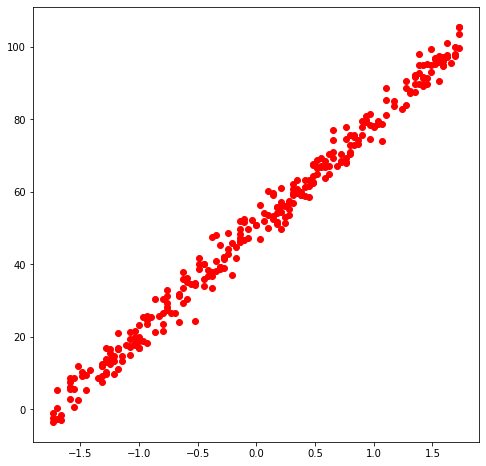

In [92]:
plt.figure(figsize=(8,8))
plt.scatter(x_test_scaled,y_test,color='red',label='GT')
plt.show()

####Now instead of using build-in model we will create it from using NumPy

Again loading and Removing the NaN values from Dataset

In [95]:
df_train = pd.read_csv('/content/sample_data/train.csv')
df_test = pd.read_csv('/content/sample_data/test.csv')

x_train = df_train['x']
y_train = df_train['y']
x_test = df_test['x']
y_test = df_test['y']

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# find NaN values in y_train and y_test
train_nan_indices = np.isnan(y_train)
test_nan_indices = np.isnan(y_test)

# remove NaN values from y_train and corresponding rows from x_train
y_train = y_train[~train_nan_indices]
x_train = x_train[~train_nan_indices]

# remove NaN values from y_test and corresponding rows from x_test
y_test = y_test[~test_nan_indices]
x_test = x_test[~test_nan_indices]

Training the Model

In [96]:
# Set learning rate and number of iterations
learning_rate = 0.0001
epochs = 1000

# Initialize coefficients and bias
a_0 = 0
a_1 = 0

# Train the model using gradient descent
for i in range(epochs):
    y_pred = a_0 * x_train + a_1
    error = y_pred - y_train
    mse = np.mean((y_train - y_pred)**2) # Compute mean squared error
    a_0 -= learning_rate * np.mean(error * x_train)
    a_1 -= learning_rate * np.mean(error)

Coefficients: 0.9988705055011785
Intercept: 0.011937938999784087


Testing Model Accuracy

In [99]:
y_prediction = a_1 + a_0 * x_test
print('R2 Score:',r2_score(y_test,y_prediction))
print("Coefficients:", a_0)
print("Intercept:", a_1)

R2 Score: 0.9887734053310671
Coefficients: 0.9988705055011785
Intercept: 0.011937938999784087


Now applying Graphical Analysis using Matplotlib for Best Fit Line 

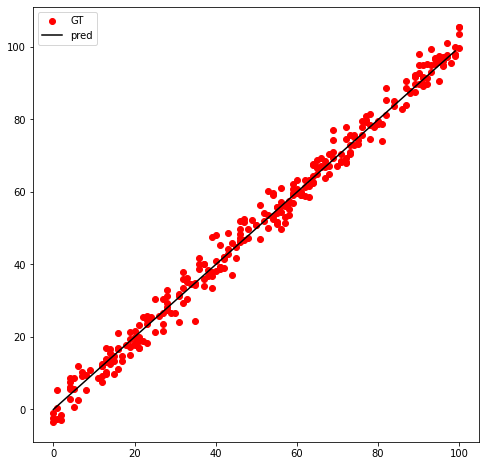

In [98]:
y_plot = []
for i in range(100):
    y_plot.append(a_1 + a_0 * i)
plt.figure(figsize=(8,8))
plt.scatter(x_test,y_test,color='red',label='GT')
plt.plot(range(len(y_plot)),y_plot,color='black',label = 'pred')
plt.legend()
plt.show()

#Conclusion

In this code, we applied simple linear regression to a dataset using two different methods. First, we used the built-in linear regression model from scikit-learn library to train our dataset, and then we tested the accuracy of the model using the R-squared score. We also applied graphical analysis to visualize the best fit line.

In the second part, we implemented simple linear regression using NumPy library. We initialized the coefficients and bias, set the learning rate and number of iterations, and trained the model using gradient descent. Finally, we tested the accuracy of the model and plotted the best fit line using Matplotlib.

Overall, this code provides a basic understanding of how simple linear regression can be applied to a dataset and how different libraries and methods can be used to achieve this.